# Plot AxiSEM3D seismograms with netcdf format
Author: Alex

In [1]:
### Modules
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import copy

In [23]:
### Inputs

INPUT_DIR = '/home/alex/Desktop/phd/private_Axisem3D/AxiSEM3D/build/output/stations/'
OUTPUT_DIR = '/home/alex/Desktop/phd/figures/seismograms/mckernel_comparison/'

STATION = 'II.IAK.ENZ'
STATION2 = 'II.IAK.ENZ'

In [52]:
#### helper functions

def time_to_freq(time):

    freq = np.asarray(range(int(len(time)/2)+1),dtype = np.float32) / (time[-1] - time[0])
    return freq

def log_gabor_filter(freq, center_f, sigma):

    filt = np.zeros(len(freq), dtype = np.float32)
    filt[1:] = np.exp( -np.power(np.log(np.asarray(freq[1:])/center_f), 2.)  / (2. * np.power(np.log(sigma),2.)))
    return filt

def butter_lowpass_filter(freq, cutoff, order):

    filt = 1 / np.sqrt(1 + np.power(freq/cutoff, 2. * order))
    return filt

def cosine_taper(t, T1, T2):
    num_steps = len(t)
    taper = np.zeros(num_steps, dtype = np.float32)

    ### find start and end indices of time window
    ind_start = 0
    ind_end = 0
    
    for it in range(1, num_steps-1):
        if t[it-1] <= T1 and t[it]>=T1:
            ind_start = it-1
        if t[it-1] <= T2 and t[it]>=T2:
            ind_end = it        
    
    taper[ind_start:ind_end+1] = 1
    print(ind_start, ind_end)
    ### taper 30% before and after window length. make sure no undefined behavior.
    cut = int(30 * (ind_end-ind_start) / 100.)
    if cut<2:
        cut=2
    print(cut)
    ### fill taper
    cos_part = np.cos(3*np.pi/2. + np.pi/2. * ( np.asarray(range(cut), dtype = np.float32) /(cut-1)))
    taper[ind_start-cut:ind_start] = cos_part
    taper[ind_end+1:ind_end+1+cut] = np.flip(cos_part,0)

    return taper

In [53]:
smgr1 = Dataset(INPUT_DIR + 'axisem3d_synthetics_nuwisdom_a0.001.nc', 'r')
smgr2 = Dataset(INPUT_DIR + 'axisem3d_synthetics_nu405_a0.001.nc', 'r')


test = smgr2.variables[STATION2]

print(test.latitude)
print(test.longitude)

### for now phi is hand defined. need to get it from lat and lon.
phi = 90. * np.pi/180. 

time = smgr1.variables['time_points'][:]
freq = time_to_freq(time)
station = smgr1.variables[STATION][:,:]
station2_temp = smgr2.variables[STATION2][:,:]
station2 = copy.deepcopy(station2_temp)

#station2[:,0] = np.cos(phi)*station2_temp[:,0] - np.sin(phi)*station2_temp[:,1] 
#station2[:,1] = np.cos(phi)*station2_temp[:,1] + np.sin(phi)*station2_temp[:,0] 


0.0
90.0


Text(0,0.5,'Amplitude (m)')

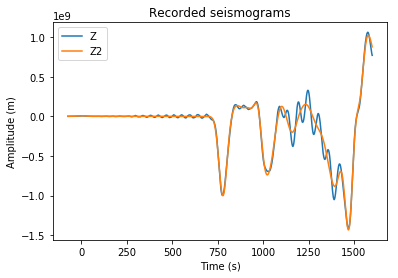

In [54]:
length = len(time)
start = 0
end = length
#start = int(length/2)
#end = start + int(length/2)

fig = plt.figure()
plt.title('Recorded seismograms')
plt.plot(time[start:end], station[start:end,2])
plt.plot(time[start:end], station2[start:end,2])
#plt.plot(time[start:end], station[start:end,1])
#plt.plot(time[start:end], station2[start:end,1])
#plt.plot(time[start:end], station[start:end,0])
#plt.plot(time[start:end], -station2[start:end,0])
### plot vertical line at given time
#plt.axvline(x=611.538,color='k', linestyle='--')


### labels
plt.legend(['Z','Z2','N','N2','Z','Z2'])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')

### Save figure
#plt.savefig(OUTPUT_DIR+'pf_test_nu450_nogauss_Z_EAK.png', dpi=300, bbox_inches='tight')

In [ ]:
filt = butter_lowpass_filter(freq, 1./90, 4)

s=np.squeeze(station[:,2])
s2=np.squeeze(station2[:,2])
s_f = np.fft.irfft( filt* np.fft.rfft(s), len(s) )
s2_f = np.fft.irfft( filt* np.fft.rfft(s2), len(s2) )


In [ ]:
fig = plt.figure()
plt.title('Recorded seismograms')
#plt.plot(time[start:end], s_f[start:end])
plt.plot(time[start:end], s2_f[start:end])
plt.plot(time[start:end], s2[start:end])

plt.legend(['Filtered Z', 'Filtered Z2', 'Z'])
#plt.savefig(OUTPUT_DIR+'pf_test_nu50_nogauss_Z_filtered90.png', dpi=300, bbox_inches='tight')

In [25]:
a = open(INPUT_DIR+'test.txt')
x=np.asarray(a.read().split(), dtype = np.float32)

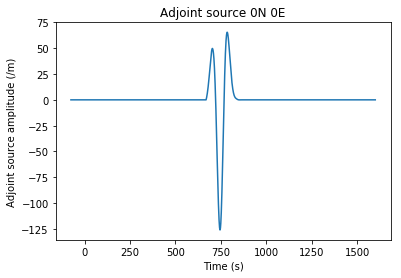

<Figure size 432x288 with 0 Axes>

In [31]:
plt.plot(time,x)
plt.xlabel('Time (s)')
plt.ylabel('Adjoint source amplitude (/m)')
plt.title('Adjoint source 0N 0E')
plt.show()

plt.savefig(OUTPUT_DIR+'adjoint_source_0N_0E.png', dpi=300, bbox_inches='tight')

In [46]:
smgr1 = Dataset(INPUT_DIR + 'axisem3d_synthetics_fwd.nc', 'r')
STATION = 'II.AAK.SPZ'
time = smgr1.variables['time_points'][:]

test = smgr1.variables[STATION]

(-159.1727430393187, 1600.0)

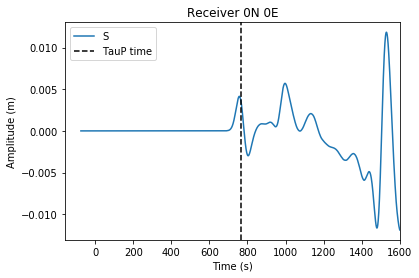

In [47]:
plt.plot(time,test[:,0])

plt.axvline(x=767.063,color='k', linestyle='--')
plt.legend(['S','TauP time'])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.title('Receiver 0N 0E')
plt.xlim(right=1600.)
#plt.savefig(OUTPUT_DIR+'S_comp_0N_0E.png', dpi=300, bbox_inches='tight')

# Specfem seismograms 

In [52]:
input_dir_specfem = "/home/alex/Desktop/phd/figures/seismograms/specfem/"
fname = "II.AAK.MXZ.sem.ascii"
fname2 = "II.AAK.MXZ.sem.ascii.adj"


In [53]:
seis_specfem = np.genfromtxt(input_dir_specfem+fname)
seis_adj_specfem = np.genfromtxt(input_dir_specfem+fname2)

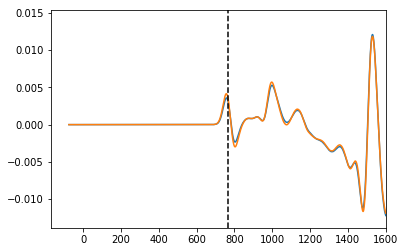

In [51]:
plt.plot(seis_specfem[:,0],seis_specfem[:,1])
plt.plot(time,test[:,0])
plt.axvline(x=767.063,color='k', linestyle='--')
plt.xlim(right=1600.)
plt.show()

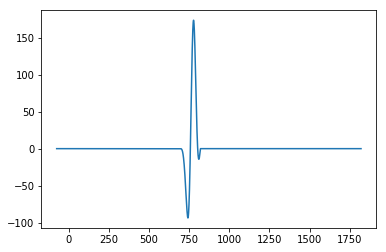

In [54]:
plt.plot(seis_adj_specfem[:,0],seis_adj_specfem[:,1])

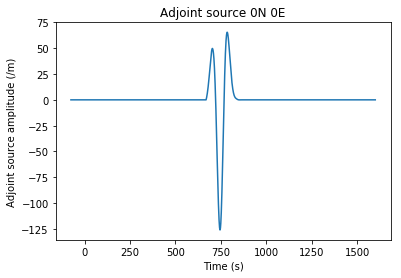

In [58]:
plt.plot(time,x)
plt.xlabel('Time (s)')
plt.ylabel('Adjoint source amplitude (/m)')
plt.title('Adjoint source 0N 0E')
plt.show()

In [56]:
np.shape(seis_specfem)

(8800, 2)

In [57]:
from scipy import signal

ModuleNotFoundError: No module named 'scipy'

In [59]:
time[0]

-75.40220302793392

In [60]:
seis_adj_specfem[0,0]

-75.0